Download from: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [1]:
import string
import pandas as pd
from tqdm import tqdm
import transformers
import pandas as pd
import json
import seaborn

In [2]:
df = pd.read_csv("./imdb_data.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
source_lengths = []
target_lengths = []

tokenizer = transformers.AutoTokenizer.from_pretrained("t5-large", cache_dir="./cache")

def get_len(text):
    return len(tokenizer.encode(text))

label_set = ["positive", "negative"]

def create_pair(s, t, split):
    prefix = "<p1><p2><p3><p4><p5> "
    line = {
        "translation": {
            "s": prefix+s,
            "t": t
        }
    }
    source_lengths.append(get_len(s))
    target_lengths.append(get_len(t))
    with open("./"+split+"lines.json", 'a+') as outfile:
        json.dump(line, outfile)
        outfile.write("\n")

In [4]:
x_list = []
y_list = []

count = 0

for index, row in df.iterrows():
    s = row["review"].split(" ")[:256]
    s = " ".join(s).strip()
    t = row["sentiment"].strip()
    x_list.append(s)
    y_list.append(t)
    count += 1
    if count > 10000:
        break

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_list, y_list, test_size=0.2, stratify=y_list)

In [7]:
split = "train"
for s, t in zip(x_train, y_train):
    create_pair(s, t, split)
    
split = "valid"
for s, t in zip(x_valid, y_valid):
    create_pair(s, t, split)

Token indices sequence length is longer than the specified maximum sequence length for this model (659 > 512). Running this sequence through the model will result in indexing errors


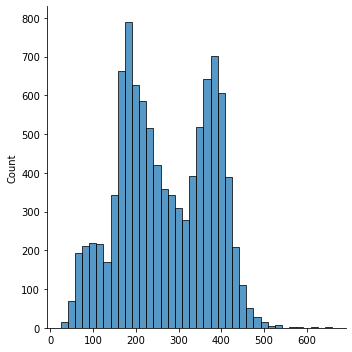

In [8]:
seaborn.displot(source_lengths)

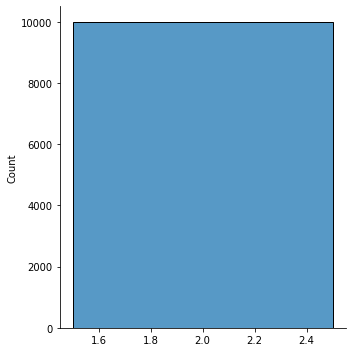

In [9]:
seaborn.displot(target_lengths)